In [ ]:
## TODO: Add Imports

## Investigate one plate - by Cell vs. by Well

In [8]:
plate_num = 25708
print('.', sep='',end='')
err_well = extract_z_score(f'{err_fld}/{plate_num}.csv', True)
print('.', sep='',end='')
raw_well = extract_z_score(f'{raw_fld}/{plate_num}.csv', True)
print('.', sep='',end='')
err_cell = extract_z_score(f'{err_fld}/{plate_num}.csv', False)
print('.', sep='',end='')
raw_cell = extract_z_score(f'{raw_fld}/{plate_num}.csv', False)
print('.', sep='',end='')

.....

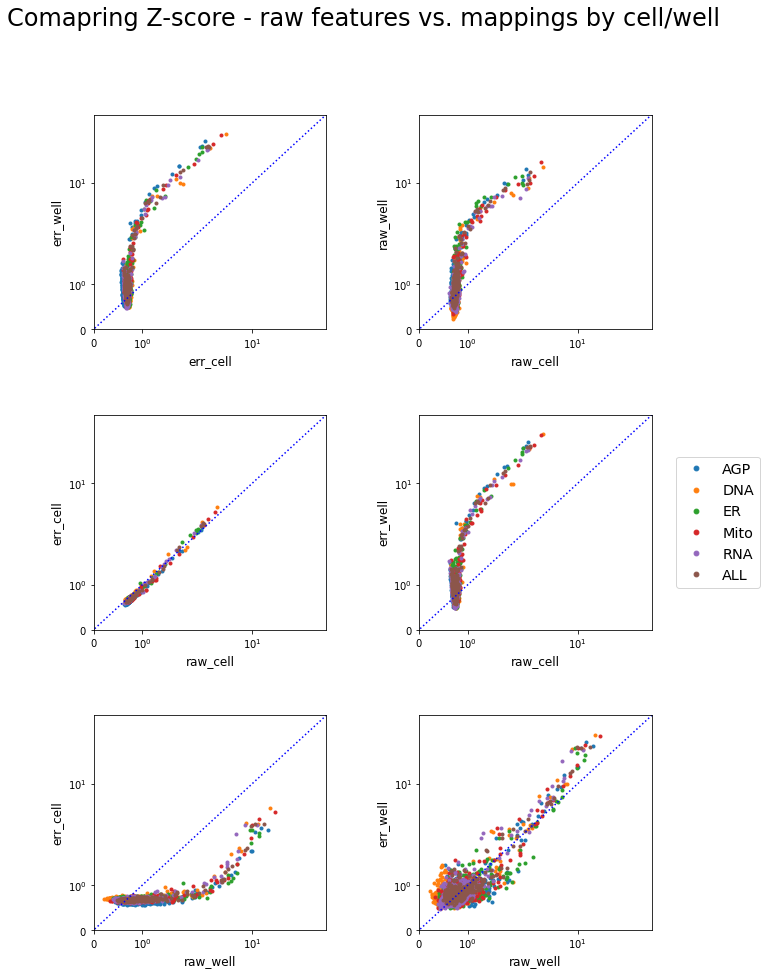

In [9]:
ncoleach = 2
ncol = ncoleach*1
nrow = 3

fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*5,nrow*5), sharey=True, sharex=True)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle(f'Comapring Z-score - raw features vs. mappings by cell/well', fontsize = 24)


cols = CHANNELS+["ALL"]


symbols = ax[0,0].plot(err_cell, err_well, f'.')
ax[0,0].set_xlabel('err_cell')
ax[0,0].set_ylabel('err_well')
ax[0,1].plot(raw_cell, raw_well, f'.')
ax[0,1].set_xlabel('raw_cell')
ax[0,1].set_ylabel('raw_well')

xlab = ['raw_cell', 'raw_well']
ylab = ['err_cell', 'err_well']
i = 2

for raw, xlab in zip([raw_cell, raw_well], ['raw_cell', 'raw_well']):
    for err, ylab in zip([err_cell, err_well], ['err_cell', 'err_well']):
        ax[i//ncoleach,i%ncoleach].plot(raw, err, f'.')
        ax[i//ncoleach,i%ncoleach].set_xlabel(xlab)
        ax[i//ncoleach,i%ncoleach].set_ylabel(ylab)
        i += 1
        
for i in range(ncol*nrow):
    ax[i//ncol,i%ncol].set_yscale('symlog', base=10)
    ax[i//ncol,i%ncol].set_xscale('symlog', base=10)
    ax[i//ncol,i%ncol].set(xlim=(0, 70), ylim=(0, 70))
    ax[i//ncol,i%ncol].plot(range(-1, 100), range(-1, 100), 'b:')
    ax[i//ncol,i%ncol].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=False, left=True, right=False)
    ax[i//ncol,i%ncol].yaxis.label.set_size(12)
    ax[i//ncol,i%ncol].xaxis.label.set_size(12)
    ax[i//ncol,i%ncol].title.set_size(14)
    

fig.legend(symbols, cols, markerscale=1.6, fontsize='x-large', bbox_to_anchor=(1.06, 0.57))

plt.show()

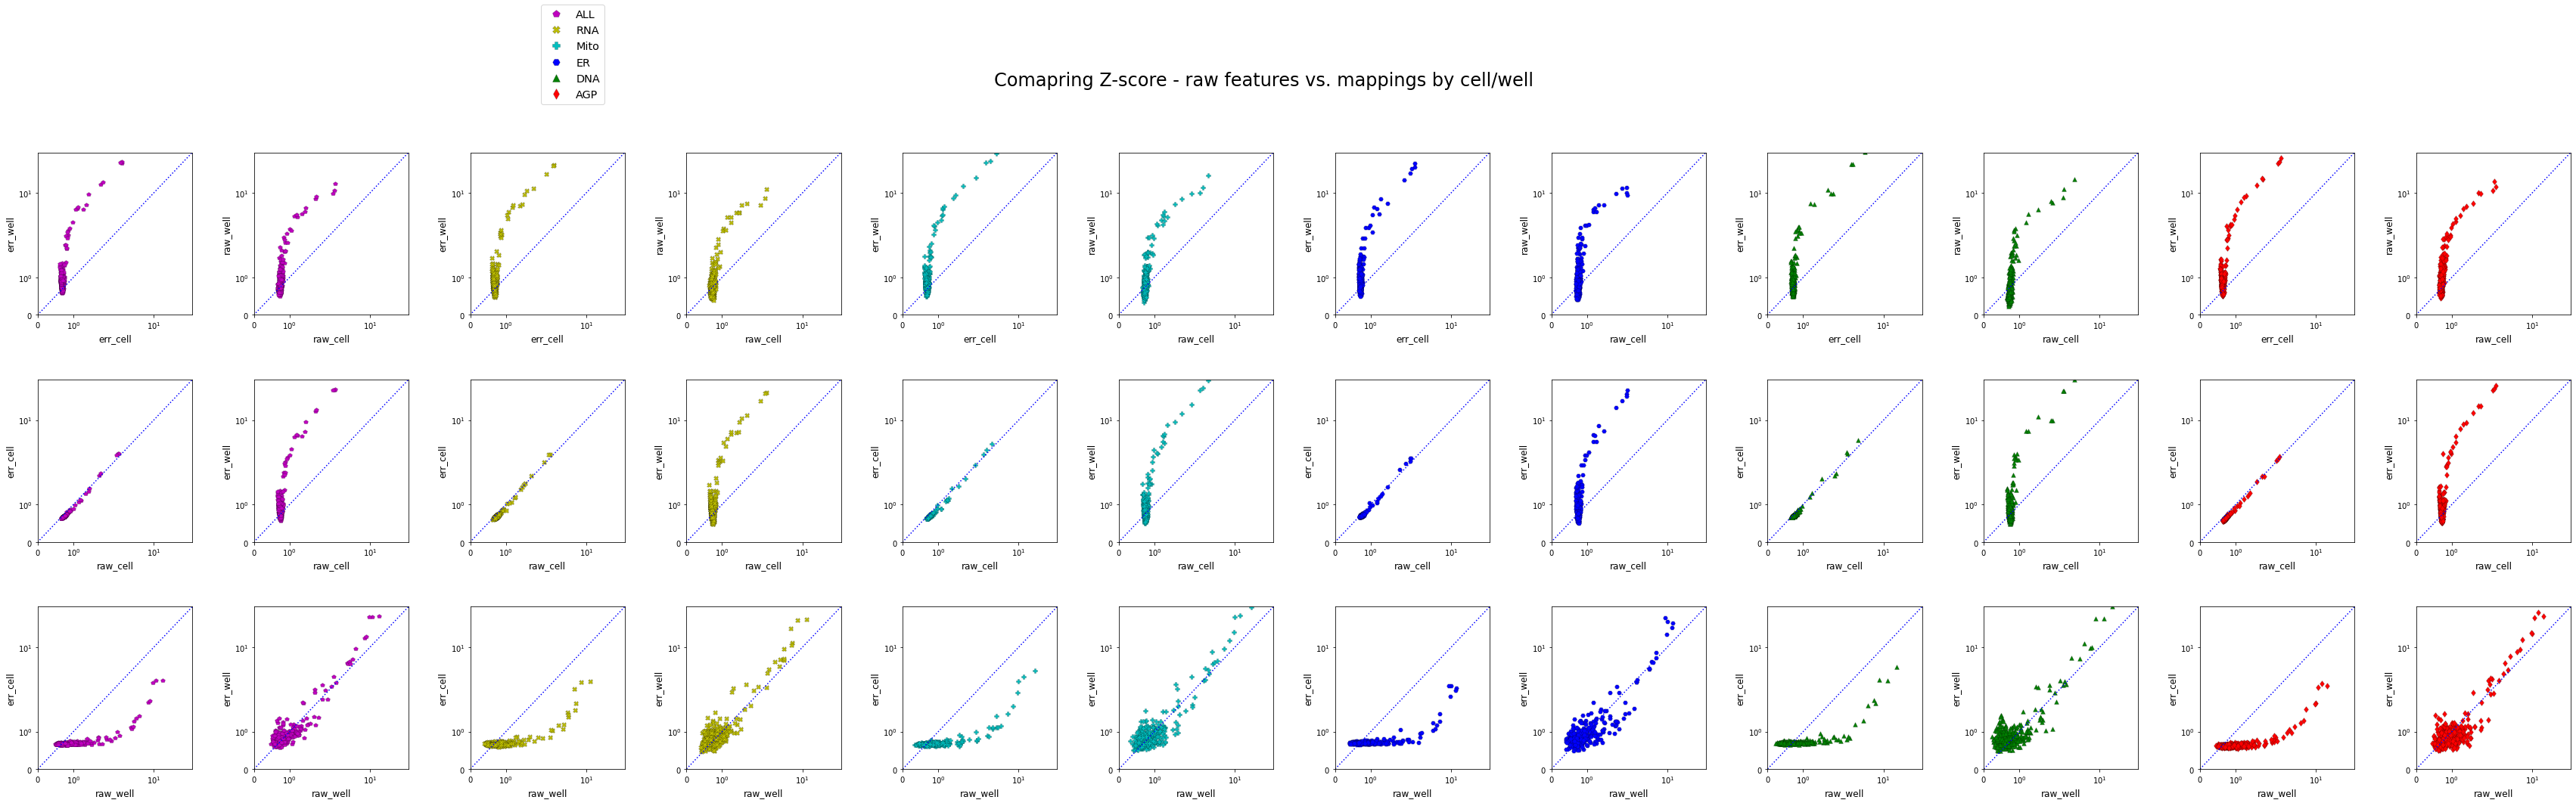

In [10]:
ncoleach = 2
ncol = ncoleach*6
nrow = 3

fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*5,nrow*5), sharey=True, sharex=True)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle(f'Comapring Z-score - raw features vs. mappings by cell/well', fontsize = 24)

markers = ['d', '^', 'H', 'P', 'X','p']
colors = ['r', 'g', 'b', 'c', 'y', 'm']
cols = CHANNELS+["ALL"]

for arr in [cols, colors, markers]:
    arr.reverse()


symbols = cols.copy()
for j, col in enumerate(cols):
    adj_col = ncoleach*j
    symbols[j] = ax[0,0+adj_col].plot(err_cell[col], err_well[col], f'{colors[j]}{markers[j]}', markeredgecolor=(0, 0, 0, 0.2))[0]
    ax[0,0+adj_col].set_xlabel('err_cell')
    ax[0,0+adj_col].set_ylabel('err_well')
    ax[0,1+adj_col].plot(raw_cell[col], raw_well[col], f'{colors[j]}{markers[j]}', markeredgecolor=(0, 0, 0, 0.2))
    ax[0,1+adj_col].set_xlabel('raw_cell')
    ax[0,1+adj_col].set_ylabel('raw_well')

    xlab = ['raw_cell', 'raw_well']
    ylab = ['err_cell', 'err_well']
    i = 2
    for raw, xlab in zip([raw_cell[col], raw_well[col]], ['raw_cell', 'raw_well']):
        for err, ylab in zip([err_cell[col], err_well[col]], ['err_cell', 'err_well']):
            ax[i//ncoleach,i%ncoleach+adj_col].plot(raw, err, f'{colors[j]}{markers[j]}', markeredgecolor=(0, 0, 0, 0.2))
            ax[i//ncoleach,i%ncoleach+adj_col].set_xlabel(xlab)
            ax[i//ncoleach,i%ncoleach+adj_col].set_ylabel(ylab)
            i += 1

limit = max([df.max().max() for df in [raw_cell, raw_well, err_cell, err_well]])//10 *10
for i in range(ncol*nrow):
    ax[i//ncol,i%ncol].set_yscale('symlog', base=10)
    ax[i//ncol,i%ncol].set_xscale('symlog', base=10)
    ax[i//ncol,i%ncol].set(xlim=(0, limit), ylim=(0, limit))
    ax[i//ncol,i%ncol].plot(range(-1, 100), range(-1, 100), 'b:')
    ax[i//ncol,i%ncol].tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=False, left=True, right=False)
    ax[i//ncol,i%ncol].yaxis.label.set_size(12)
    ax[i//ncol,i%ncol].xaxis.label.set_size(12)
    ax[i//ncol,i%ncol].title.set_size(14)
    

fig.legend(symbols, cols, loc='right', markerscale=1.6, fontsize='x-large', bbox_to_anchor=(0.3, 1))

plt.show()

In [11]:
def get_scaler(df, by_well):
    _, _, channels = list_columns(df)
    channels_cols = [col for ch_cols in channels.values() for col in ch_cols]
    df = df[channels_cols]

    if by_well:
        df = df.groupby(by=['Plate', LABEL_FIELD, 'Metadata_broad_sample', 'Image_Metadata_Well']).apply(lambda g: g.mean())

    df_mock = df[df.index.isin(['mock'], 1)]

    scaler = StandardScaler()
    scaler.fit(df_mock)
    del df_mock
    
    return scaler

plate_num = 25708
df = load_plate_csv(f'{err_fld}/{plate_num}.csv')
scaler_err_cell = get_scaler(df, False)
scaler_err_well = get_scaler(df, True)
df = load_plate_csv(f'{raw_fld}/{plate_num}.csv')
scaler_raw_cell = get_scaler(df, False)
scaler_raw_well = get_scaler(df, True)


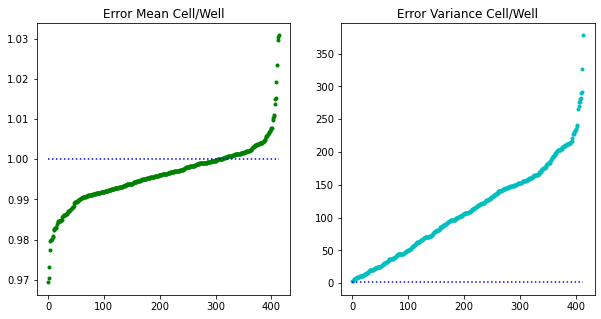

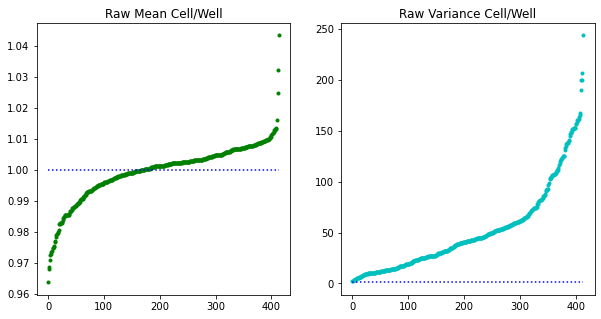

In [13]:
fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(2*5,1*5))

ratio_err_mean = scaler_err_cell.mean_/scaler_err_well.mean_
ratio_err_mean.sort()
ax1[0].plot(range(414), ratio_err_mean, 'g.')
ax1[0].set_title('Error Mean Cell/Well')

ratio_err_var = scaler_err_cell.var_/scaler_err_well.var_
ratio_err_var.sort()
ax1[1].plot(range(414), ratio_err_var, 'c.')
ax1[1].set_title('Error Variance Cell/Well')


fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(2*5,1*5))

ratio_raw_mean = scaler_raw_cell.mean_/scaler_raw_well.mean_
ratio_raw_mean.sort()
ax2[0].plot(range(414), ratio_raw_mean, 'g.')
ax2[0].set_title('Raw Mean Cell/Well')

ratio_raw_var = scaler_raw_cell.var_/scaler_raw_well.var_
ratio_raw_var.sort()
ax2[1].plot(range(414), ratio_raw_var, 'c.')
ax2[1].set_title('Raw Variance Cell/Well')


for ax in [ax1, ax2]:
    for sub_ax in ax:
#         sub_ax.set_yscale('symlog', base=10)
#         sub_ax.set_xscale('symlog', base=10)
        sub_ax.plot(range(414), [1]*414, 'b:')